#1. Code tham khảo về pmf, cdf 

Số câu của bài thi trắc nghiệm cuối kỳ môn toán của sinh viên Bách khoa Hà Nội được cho biến ngẫu nhiên có phân phối nhị thức. Giả sử một số sinh viên không học bài thì gọi $X$ là số câu mà sinh viên trả lời được.  

$X\sim B(n=40; p=0.25)$

a) Tìm xác suất $P(X=25)$ 

b)Tìm xác suất để $P(X<=12)$

d) Tìm xác suất $P( 25<X<35)$

c) Tìm kỳ vọng và phương sai của X

In [1]:
from scipy.stats import binom # Gọi thư viện có gói nhị thức 
n=40 
p=0.25
X=binom(n,p) #Khai báo biến X có phân phối nhị thức 


In [2]:
# P(X=25)=p_X(25)=X.pmf(25)
X.pmf(25)

4.774401587646182e-07

In [3]:
#P(X<=12)=F_X(12)=X.cdf(12)
X.cdf(12)

0.8208657576539586

In [4]:
#P(25<X<35)=P(X<=34)-P(X<=25)=F_X(34)-F_X(25)=X.cdf(34)-X.cdf(25)
X.cdf(34)-X.cdf(25)

1.1052577697512334e-07

In [5]:
#Kỳ vọng 
X.mean()

10.0

In [6]:
#Phương sai 
X.var()

7.5

# 2. Code về hàm pdf và cdf

Điểm của sinh viên Bách khoa Hà Nội giả sử là biến ngẫu nhiên $Y$ tuân theo luật phân phối chuẩn $Y\sim N(\mu=6, \sigma^2=2.5^2)$

a) Tìm xác suất P(X>4)

b) Tìm xác suất $P(4<X<8.5)$

c) Tìm xác suất có điều kiện $P(X<0.85|X>4)$

d) Tạo ra một chuỗi n=100 giá trị nhiễu có phân phối chuẩn với kỳ vọng 0 và phương sai $2.5^2$ 





In [7]:
from scipy.stats import norm 

mu=6
sigma=2.5
Y=norm(mu, sigma)
#P(X>4)
1-Y.cdf(4)

0.7881446014166034

In [8]:
#P(4<X<8.5)

Y.cdf(8.5)-Y.cdf(4)



0.6294893474851462

In [9]:
#Tìm xác suất có điều kiện $P(X<0.85|X>4)$

(Y.cdf(8.5)-Y.cdf(4))/(1-Y.cdf(4))


0.7986977850938879

In [18]:
#d) 

import numpy as np
import pandas as pd
# Set random seed for reproducibility
np.random.seed(0)

# Number of time periods
n = 100

# Parameters for the normal distribution
mu1 = 0  # Mean
sigma1 = sigma# Standard deviation

Z=norm(mu1, sigma1)

# Generate independent normal random values
random_values = Z.rvs(size=n)

# Create a time index (e.g., daily time series)
date_rng = pd.date_range(start='2023-01-01', periods=n, freq='D')

# Create a DataFrame with the simulated time series
df = pd.DataFrame({'Date': date_rng, 'Value': random_values})

# Print the first few rows of the DataFrame
print(df.head())



        Date     Value
0 2023-01-01  1.764052
1 2023-01-02  0.400157
2 2023-01-03  0.978738
3 2023-01-04  2.240893
4 2023-01-05  1.867558


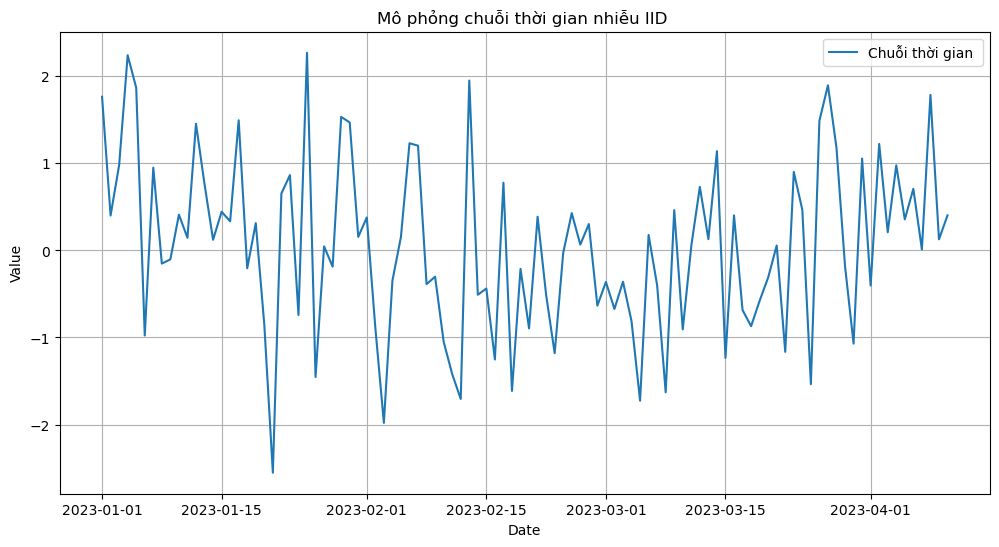

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Chuỗi thời gian ')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Mô phỏng chuỗi thời gian nhiễu IID ' )
plt.legend()
plt.grid(True)
plt.show()









#3. Biến ngẫu nhiên 2 chiều 

Tại một trạm xăng, xăng được lưu trữ trong bể chứa theo tuần. Gọi $X$ là biến ngẫu nhiên biểu diễn cho tỷ lệ dung tích được lưu trữ trong tuần. Gọi $Y$ là tỷ lệ của dung tích bể bán được trong cùng một tuần. Chúng ta biết rằng trạm xăng không thể bán được số xăng nhiều hơn những gì được tích trữ trong tuần nên có nghĩa là $Y<X$. Hàm mật độ đồng thời của biến ngẫu nhiên $(X,Y)$ là:



$f_{X,Y}(x,y)=\begin{cases}{3x}, 0 \leq y\leq x \leq 1\\
0; \text{trái lại};
\end{cases}$


a) Tìm  $P(X\leq 1/2| Y\leq 0.03)$. 

b) Tìm $P(Y<0.3X|Y>0.1X)$.





In [20]:
#a)
import scipy.integrate
prob_D1 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 0.03, lambda x: 0, lambda x: x)[0]
prob_D2 = scipy.integrate.dblquad(lambda y, x: 3*x, 0.03, 0.5, lambda x: 0, lambda x: 0.03)[0]
prob_D3 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 0.03, lambda x: 0, lambda x: x)[0]
prob_D4 = scipy.integrate.dblquad(lambda y, x: 3*x, 0.03, 1, lambda x: 0, lambda x: 0.03)[0]
prob_D = (prob_D1 + prob_D2)/(prob_D3 + prob_D4)

print("Xác suất cần tìm:", prob_D)

Xác suất cần tìm: 0.24977493247974392


In [21]:
#b)
import scipy.integrate
prob_D1 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 1, lambda x: 0.1*x, lambda x: 0.3*x)[0]
prob_D2 = scipy.integrate.dblquad(lambda y, x: 3*x, 0, 1, lambda x: 0.1*x, lambda x: x)[0]
prob_D = prob_D1/prob_D2

print("Xác suất cần tìm:", prob_D)

Xác suất cần tìm: 0.2222222222222222


#Bài tập thực hành 

# Bài 1: 


Thu nhập của một người lao động của một nước  là biến ngẫu nhiên $X$ có phân phối chuẩn $Norm(\mu= 9,\sigma=10)$. Chọn ngẫu nhiên một người lao động

3.1) Tìm xác suất thu nhập của người lao động được chọn cao hơn gấp đôi mức lương trung bình. 

3.2) Tìm ngưỡng $c$ là ngưỡng mức lương thu nhập  cao sao cho  $P(X<c)=0.2$.

Ghi chú: Biết rằng phân phối chuẩn tắc $$\Phi(x)=P(X<x)=\int_{-\infty}^{x}\frac{e^{-t^2/2}}{\sqrt{2.\pi}}dt$$
# Bài 2: 
Tại một trạm xăng, xăng được lưu trữ trong bể chứa theo tuần. Gọi $X$ là biến ngẫu nhiên biểu diễn cho tỷ lệ dung tích được lưu trữ trong tuần. Gọi $Y$ là tỷ lệ của dung tích bể bán được trong cùng một tuần. Chúng ta biết rằng trạm xăng không thể bán được số xăng nhiều hơn những gì được tích trữ trong tuần nên có nghĩa là $Y<X$. Hàm mật độ đồng thời của biến ngẫu nhiên $(X,Y)$ là:



$f_{X,Y}(x,y)=\begin{cases}{3x}, 0 \leq y\leq x \leq 1\\
0; \text{trái lại};
\end{cases}$


a) Tìm  $P(X\leq 1/2, Y\leq 1/4)$. 

b) Tìm $P(Y<0.4X)$.

# Bài 3: 

Tạo ra một chuỗi n=100 giá trị nhiễu có phân phối đều trong khoảng $[-3,3]$

